epoch       0.000 | loss_total     0.00063 | train_MAE     0.94328 | valid_MAE     0.94338 | grad_wrt_mu     0.00002 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     0.00062 | train_MAE     0.94328 | valid_MAE     0.94338 | grad_wrt_mu     0.00002 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     0.00061 | train_MAE     0.94328 | valid_MAE     0.94338 | grad_wrt_mu     0.00003 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     0.00067 | train_MAE     0.94328 | valid_MAE     0.94338 | grad_wrt_mu     0.00001 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.00069 | train_MAE     0

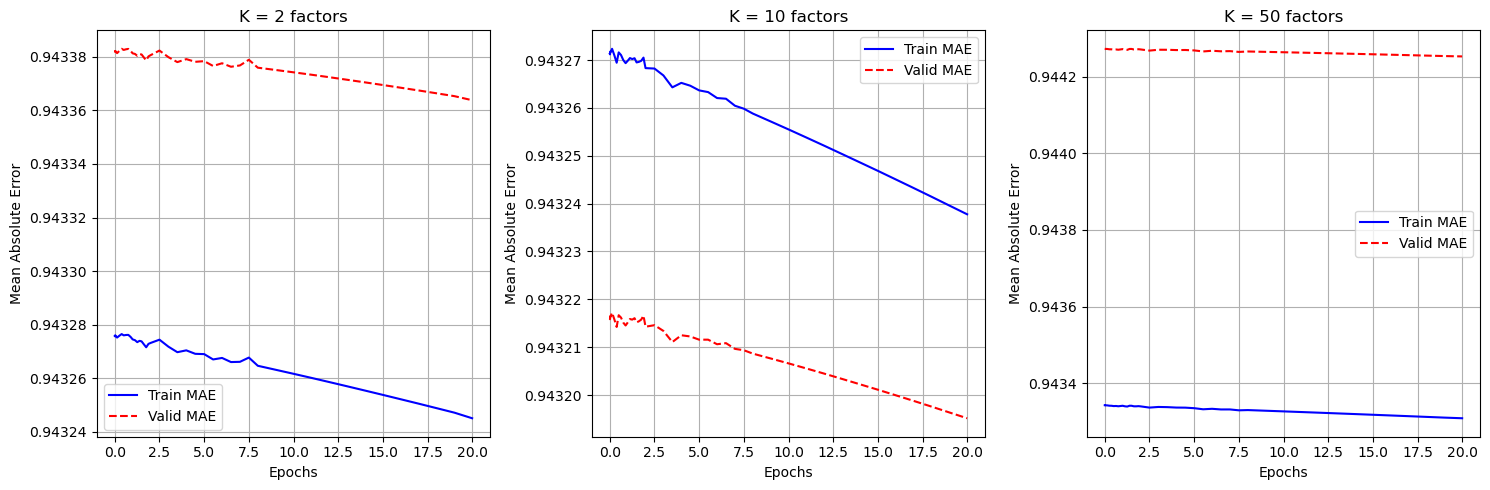

In [6]:
import matplotlib.pyplot as plt
from train_valid_test_loader import load_train_valid_test_datasets
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem

# Load the datasets
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set up the plot
plt.figure(figsize=(15, 5))

# Train models with different K values
k_values = [2, 10, 50]
for idx, k in enumerate(k_values):
    # Create and train model
    model = CollabFilterOneVectorPerItem(
    n_epochs=20,          
    batch_size=1000,      
    step_size=0.1,        
    n_factors=k,          
    alpha=0.0,             
    )
    
    # Initialize and fit the model
    model.init_parameter_dict(n_users, n_items, train_tuple)
    model.fit(train_tuple, valid_tuple)
    
    # Create subplot for this K value
    plt.subplot(1, 3, idx + 1)
    
    # Plot training and validation MAE vs epoch
    plt.plot(model.trace_epoch, model.trace_mae_train, 'b-', label='Train MAE')
    plt.plot(model.trace_epoch, model.trace_mae_valid, 'r--', label='Valid MAE')
    
    plt.title(f'K = {k} factors')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.grid(True)
    
    # Print final performance metrics
    final_train_mae = model.trace_mae_train[-1]
    final_valid_mae = model.trace_mae_valid[-1]
    print(f"\nResults for K = {k}:")
    print(f"Final Training MAE: {final_train_mae:.4f}")
    print(f"Final Validation MAE: {final_valid_mae:.4f}")

plt.tight_layout()
plt.show()

epoch       0.000 | loss_total     0.00006 | train_MAE     0.94334 | valid_MAE     0.94427 | grad_wrt_mu     0.00000 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.143 | loss_total     0.00006 | train_MAE     0.94334 | valid_MAE     0.94427 | grad_wrt_mu     0.00000 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.286 | loss_total     0.00007 | train_MAE     0.94334 | valid_MAE     0.94427 | grad_wrt_mu     0.00000 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.429 | loss_total     0.00007 | train_MAE     0.94334 | valid_MAE     0.94427 | grad_wrt_mu     0.00000 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.571 | loss_total     0.00006 | train_MAE     0

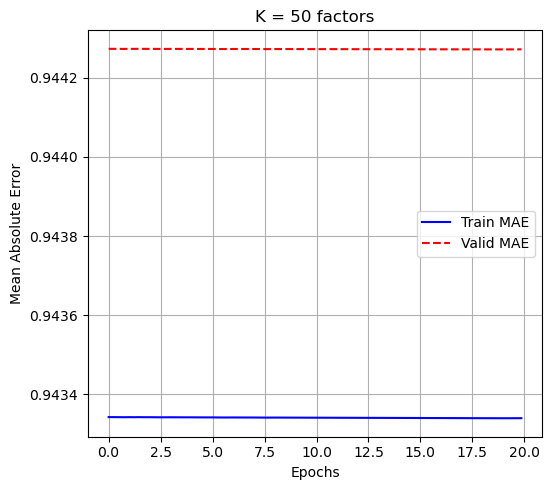

In [15]:
import matplotlib.pyplot as plt
from train_valid_test_loader import load_train_valid_test_datasets
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem

# Load the datasets
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set up the plot
plt.figure(figsize=(15, 5))

# Train models with different K values
k_values = [50]
for idx, k in enumerate(k_values):
    # Create and train model
    model = CollabFilterOneVectorPerItem(
    n_epochs=20,          
    batch_size=10000,      
    step_size=1.0,        
    n_factors=k,          
    alpha=0.1,             
    )
    
    # Initialize and fit the model
    model.init_parameter_dict(n_users, n_items, train_tuple)
    model.fit(train_tuple, valid_tuple)
    
    # Create subplot for this K value
    plt.subplot(1, 3, idx + 1)
    
    # Plot training and validation MAE vs epoch
    plt.plot(model.trace_epoch, model.trace_mae_train, 'b-', label='Train MAE')
    plt.plot(model.trace_epoch, model.trace_mae_valid, 'r--', label='Valid MAE')
    
    plt.title(f'K = {k} factors')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.grid(True)
    
    # Print final performance metrics
    final_train_mae = model.trace_mae_train[-1]
    final_valid_mae = model.trace_mae_valid[-1]
    print(f"\nResults for K = {k}:")
    print(f"Final Training MAE: {final_train_mae:.4f}")
    print(f"Final Validation MAE: {final_valid_mae:.4f}")

plt.tight_layout()
plt.show()

In [2]:
import matplotlib.pyplot as plt
from train_valid_test_loader import load_train_valid_test_datasets
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
import numpy as np

# Load the datasets
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Define the K values you want to test
k_values = [2, 10, 50]

n_epochs = 20
batch_size = 10000
step_size = 1.0
alpha = 0.1  

results = []

for k in k_values:
    # Create and train model with chosen hyperparams
    model = CollabFilterOneVectorPerItem(
        n_epochs=n_epochs,
        batch_size=batch_size,
        step_size=step_size,
        n_factors=k,
        alpha=alpha
    )
    
    model.init_parameter_dict(n_users, n_items, train_tuple)
    model.fit(train_tuple, valid_tuple)
    
    # Compute final MAE on training, validation, and test sets
    final_train_mae = model.trace_mae_train[-1]
    final_valid_mae = model.trace_mae_valid[-1]
    
    # For test MAE, predict on test set
    user_id_test, item_id_test, rating_test = test_tuple
    yhat_test = model.predict(user_id_test, item_id_test)
    final_test_mae = np.mean(np.abs(yhat_test - rating_test))
    
    results.append((k, final_train_mae, final_valid_mae, final_test_mae))

# Print a summary table
print("\nSummary of Results (Part 1C):")
print("{:<8} {:<15} {:<15} {:<15}".format("K", "Train_MAE", "Valid_MAE", "Test_MAE"))
for (k, train_mae, valid_mae, test_mae) in results:
    print("{:<8} {:<15.4f} {:<15.4f} {:<15.4f}".format(k, train_mae, valid_mae, test_mae))

# Determine which K gives the best validation performance
best_k = min(results, key=lambda x: x[2])  # x[2] is the valid MAE
print("\nThe best K in terms of validation MAE is K = {} with Valid_MAE = {:.4f}".format(best_k[0], best_k[2]))


epoch       0.000 | loss_total     0.00006 | train_MAE     0.94328 | valid_MAE     0.94338 | grad_wrt_mu     0.00000 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.143 | loss_total     0.00006 | train_MAE     0.94328 | valid_MAE     0.94338 | grad_wrt_mu     0.00000 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.286 | loss_total     0.00006 | train_MAE     0.94328 | valid_MAE     0.94338 | grad_wrt_mu     0.00000 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.429 | loss_total     0.00006 | train_MAE     0.94328 | valid_MAE     0.94338 | grad_wrt_mu     0.00000 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.571 | loss_total     0.00007 | train_MAE     0